# 실습 2 - 하진기, 이재원, 성유기, 천민우 

## credit card - normal_amount, split (X), sampling(X)

In [2]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action = 'ignore')

### 데이터 준비  

In [4]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

### EDA

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:xlabel='Amount', ylabel='Density'>

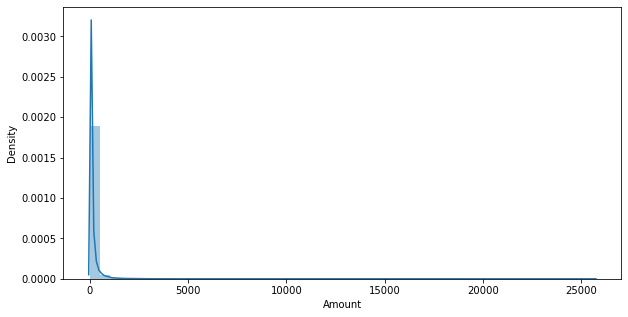

In [7]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

### Standard Scaling

In [108]:
df['normal_Amount'] = scale(df['Amount'])
df = df.drop(['Amount'], axis = 1, inplace = False)

In [10]:
y = df['Class']
x = df.drop(['Class'], axis = 1, inplace = False)

### 모델 정의

In [109]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x, y, validation_split = 0.2, epochs = 10, batch_size = 400)

Epoch 1/10
57/57 [==============================] - 0s 2ms/step - loss: 44.0160 - accuracy: 0.9556 - val_loss: 4.2899 - val_accuracy: 0.9993
Epoch 2/10
57/57 [==============================] - 0s 861us/step - loss: 18.9315 - accuracy: 0.9978 - val_loss: 3.9707 - val_accuracy: 0.9993
Epoch 3/10
57/57 [==============================] - 0s 790us/step - loss: 18.4492 - accuracy: 0.9977 - val_loss: 3.4789 - val_accuracy: 0.9993
Epoch 4/10
57/57 [==============================] - 0s 791us/step - loss: 15.7102 - accuracy: 0.9977 - val_loss: 2.8993 - val_accuracy: 0.9993
Epoch 5/10
57/57 [==============================] - 0s 808us/step - loss: 9.0592 - accuracy: 0.9982 - val_loss: 2.2563 - val_accuracy: 0.9993
Epoch 6/10
57/57 [==============================] - 0s 794us/step - loss: 6.5583 - accuracy: 0.9983 - val_loss: 1.5405 - val_accuracy: 0.9993
Epoch 7/10
57/57 [==============================] - 0s 786us/step - loss: 4.6175 - accuracy: 0.9983 - val_loss: 0.8316 - val_accuracy: 0.9993
Epoc

## credit card - normal_amount, split (O), sampling(X)

In [31]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')
df['normal_Amount'] = scale(df['Amount'])
df = df.drop(['Amount'], axis = 1, inplace = False)

In [40]:
y = df['Class']
x = df.drop(['Class'], axis = 1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 5)

In [41]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 400)

Epoch 1/10
485/485 [==============================] - 0s 673us/step - loss: 225.4220 - accuracy: 0.9316 - val_loss: 6.1760 - val_accuracy: 0.9981
Epoch 2/10
485/485 [==============================] - 0s 520us/step - loss: 2.8849 - accuracy: 0.9972 - val_loss: 0.0427 - val_accuracy: 0.9953
Epoch 3/10
485/485 [==============================] - 0s 569us/step - loss: 10.5109 - accuracy: 0.9888 - val_loss: 0.1034 - val_accuracy: 0.9960
Epoch 4/10
485/485 [==============================] - 0s 536us/step - loss: 4.2534 - accuracy: 0.9939 - val_loss: 16.9325 - val_accuracy: 0.9982
Epoch 5/10
485/485 [==============================] - 0s 556us/step - loss: 11.5087 - accuracy: 0.9982 - val_loss: 0.0889 - val_accuracy: 0.9931
Epoch 6/10
485/485 [==============================] - 0s 546us/step - loss: 1.0942 - accuracy: 0.9951 - val_loss: 0.2085 - val_accuracy: 0.9975
Epoch 7/10
485/485 [==============================] - 0s 547us/step - loss: 1.3042 - accuracy: 0.9962 - val_loss: 22.3260 - val_acc

## credit card - normal_amount, split (O), sampling(frac)

In [98]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')
df['normal_Amount'] = scale(df['Amount'])
df = df.drop(['Amount'], axis = 1, inplace = False)

In [99]:
df_pre = df.sample(frac = 0.1, random_state = 10 )
df_pre.shape

(28481, 31)

In [44]:
y = df_pre['Class']
x = df_pre.drop(['Class'], axis = 1, inplace = False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 5)

In [45]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x, y, validation_split = 0.2, epochs = 10, batch_size = 400)

Epoch 1/10
57/57 [==============================] - 0s 2ms/step - loss: 33.5167 - accuracy: 0.9180 - val_loss: 1.0342 - val_accuracy: 0.9993
Epoch 2/10
57/57 [==============================] - 0s 850us/step - loss: 4.1473 - accuracy: 0.9978 - val_loss: 0.8634 - val_accuracy: 0.9993
Epoch 3/10
57/57 [==============================] - 0s 791us/step - loss: 3.8456 - accuracy: 0.9977 - val_loss: 0.6266 - val_accuracy: 0.9993
Epoch 4/10
57/57 [==============================] - 0s 808us/step - loss: 1.5475 - accuracy: 0.9985 - val_loss: 0.3522 - val_accuracy: 0.9993
Epoch 5/10
57/57 [==============================] - 0s 821us/step - loss: 1.0422 - accuracy: 0.9983 - val_loss: 0.0508 - val_accuracy: 0.9988
Epoch 6/10
57/57 [==============================] - 0s 810us/step - loss: 0.1301 - accuracy: 0.9950 - val_loss: 0.0095 - val_accuracy: 0.9961
Epoch 7/10
57/57 [==============================] - 0s 784us/step - loss: 0.0607 - accuracy: 0.9937 - val_loss: 0.0060 - val_accuracy: 0.9984
Epoch 8

## credit card - normal_amount, split (X), sampling(n / 1:1)

In [100]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')
df['normal_Amount'] = scale(df['Amount'])
df = df.drop(['Amount'], axis = 1, inplace = False)

<AxesSubplot:xlabel='Class', ylabel='count'>

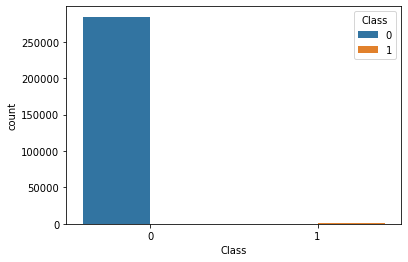

In [101]:
sns.countplot(x = df.Class, hue=df.Class)

In [67]:
a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=492, random_state=10)
data = pd.concat([a, c])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142905,85008.0,-0.341475,0.900211,0.331773,0.813116,3.184109,3.824945,0.221303,0.577237,-0.819912,...,0.030354,0.229812,-0.281175,0.901199,-0.396459,-0.097724,-0.266486,-0.266440,0,-0.350191
266742,162471.0,0.051338,0.250632,-0.146602,-0.603377,-0.289108,0.867031,-0.716845,0.916121,0.761860,...,0.301229,0.682096,0.262251,-0.396272,-1.105012,0.357460,-0.058522,-0.011369,0,-0.065367
135785,81398.0,-0.510727,0.784119,1.619260,-0.063728,-0.287118,-0.758775,0.451503,0.193062,-0.337795,...,-0.180919,-0.626206,0.039477,0.455717,-0.320913,0.048237,0.243857,0.109477,0,-0.317287
284703,172699.0,1.019594,-1.956473,-1.431268,0.539727,-0.499995,0.301251,0.326079,-0.062475,1.121288,...,-0.081894,-1.202749,-0.182683,-1.075679,-0.417648,-1.080842,-0.049144,0.039078,0,1.733372


In [68]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)

In [69]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x, y, validation_split = 0.2, epochs = 10, batch_size = 400)

Epoch 1/10
57/57 [==============================] - 0s 2ms/step - loss: 13.4200 - accuracy: 0.9763 - val_loss: 1.9198 - val_accuracy: 0.9993
Epoch 2/10
57/57 [==============================] - 0s 851us/step - loss: 6.9315 - accuracy: 0.9980 - val_loss: 1.6683 - val_accuracy: 0.9993
Epoch 3/10
57/57 [==============================] - 0s 811us/step - loss: 5.3173 - accuracy: 0.9982 - val_loss: 1.2233 - val_accuracy: 0.9993
Epoch 4/10
57/57 [==============================] - 0s 840us/step - loss: 3.3067 - accuracy: 0.9982 - val_loss: 0.7283 - val_accuracy: 0.9993
Epoch 5/10
57/57 [==============================] - 0s 814us/step - loss: 2.5141 - accuracy: 0.9978 - val_loss: 0.1533 - val_accuracy: 0.9993
Epoch 6/10
57/57 [==============================] - 0s 794us/step - loss: 1.1476 - accuracy: 0.9964 - val_loss: 0.9590 - val_accuracy: 0.9993
Epoch 7/10
57/57 [==============================] - 0s 809us/step - loss: 3.6208 - accuracy: 0.9977 - val_loss: 0.2668 - val_accuracy: 0.9993
Epoch 8

## credit card - normal_amount, split (X), sampling(n / 3:1)

In [62]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')
df['normal_Amount'] = scale(df['Amount'])
df = df.drop(['Amount'], axis = 1, inplace = False)

In [63]:
a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=1479, random_state=10)
data = pd.concat([a, c])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82348,59367.0,1.192189,-0.063020,0.130224,0.048602,-0.576313,-1.146488,0.121625,-0.078745,-0.049724,...,-0.385714,-1.355440,0.222594,0.504134,-0.032130,0.595740,-0.122185,-0.004030,0,-0.221333
168613,119308.0,-1.197471,1.388525,0.215220,-0.922353,-0.130133,-0.381091,-0.076796,0.482383,0.892307,...,-0.161912,-0.779128,0.090628,0.495131,-0.231955,-0.340336,-0.544392,0.054976,0,-0.344314
7001,9164.0,1.266916,-0.227154,-0.283104,-0.396024,1.536413,3.735560,-1.267179,0.924951,1.751111,...,-0.133468,-0.252073,0.004096,0.978280,0.303960,0.432750,-0.023538,0.015141,0,-0.320685
67891,52740.0,-1.792495,1.881797,0.580080,1.070823,-0.852380,-0.013791,-0.523862,1.327319,-0.602669,...,0.002532,-0.123419,0.056480,0.094167,-0.126013,-0.466111,-0.208815,-0.003144,0,-0.304493


In [64]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.15, random_state = 5)

In [66]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x_1, y_1, validation_split = 0.2, epochs = 10, batch_size = 400)

Epoch 1/10
4/4 [==============================] - 0s 27ms/step - loss: 3425.5872 - accuracy: 0.3072 - val_loss: 1854.7664 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 775.3859 - accuracy: 0.4057 - val_loss: 3.9535e-08 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 508.6896 - accuracy: 0.6762 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 676.7169 - accuracy: 0.6893 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 551.3305 - accuracy: 0.6825 - val_loss: 8.2769e-07 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 215.9815 - accuracy: 0.6544 - val_loss: 309.7011 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 181.6439 - accuracy: 0.3641 - val_loss: 0.0011 - val_accura

## credit card - normal_amount, normal_time, split (X), sampling(n / 1:1)

In [12]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['normal_Amount'] = scale(df['Amount'])
df['normal_Time'] = scale(df['Time'])
df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=492, random_state=10)
data = pd.concat([a, c])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount,normal_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229,-1.988034
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758,-1.986644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031,-1.902623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342,-1.849472
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231,-1.838248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142905,-0.341475,0.900211,0.331773,0.813116,3.184109,3.824945,0.221303,0.577237,-0.819912,0.411051,...,0.229812,-0.281175,0.901199,-0.396459,-0.097724,-0.266486,-0.266440,0,-0.350191,-0.206491
266742,0.051338,0.250632,-0.146602,-0.603377,-0.289108,0.867031,-0.716845,0.916121,0.761860,-1.107982,...,0.682096,0.262251,-0.396272,-1.105012,0.357460,-0.058522,-0.011369,0,-0.065367,1.424719
135785,-0.510727,0.784119,1.619260,-0.063728,-0.287118,-0.758775,0.451503,0.193062,-0.337795,-0.081085,...,-0.626206,0.039477,0.455717,-0.320913,0.048237,0.243857,0.109477,0,-0.317287,-0.282510
284703,1.019594,-1.956473,-1.431268,0.539727,-0.499995,0.301251,0.326079,-0.062475,1.121288,-0.403165,...,-1.202749,-0.182683,-1.075679,-0.417648,-1.080842,-0.049144,0.039078,0,1.733372,1.640099


In [13]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)

In [14]:
model = Sequential()
model.add(Dense(30, input_dim = 30, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [15]:
MODEL_DIR = '/Users/jjink/Desktop/python/model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)
    
modelpath = '/Users/jjink/Desktop/python/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True) # verbose = 1 진행과정 막대기 출력
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

In [16]:
history = model.fit(x_1,y_1, validation_split = 0.1, epochs = 30, batch_size = 30, callbacks = [checkpointer,early_stopping_callback])

Epoch 1/30
30/30 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5079 - val_loss: 0.7193 - val_accuracy: 0.2525

Epoch 00001: val_loss improved from inf to 0.71928, saving model to /Users/jjink/Desktop/python/model/01-0.7193.hdf5
Epoch 2/30
30/30 [==============================] - 0s 954us/step - loss: 0.5251 - accuracy: 0.6262 - val_loss: 0.7117 - val_accuracy: 0.4848

Epoch 00002: val_loss improved from 0.71928 to 0.71166, saving model to /Users/jjink/Desktop/python/model/02-0.7117.hdf5
Epoch 3/30
30/30 [==============================] - 0s 921us/step - loss: 0.4280 - accuracy: 0.7720 - val_loss: 0.6489 - val_accuracy: 0.7273

Epoch 00003: val_loss improved from 0.71166 to 0.64885, saving model to /Users/jjink/Desktop/python/model/03-0.6489.hdf5
Epoch 4/30
30/30 [==============================] - 0s 887us/step - loss: 0.3793 - accuracy: 0.8655 - val_loss: 0.5713 - val_accuracy: 0.8485

Epoch 00004: val_loss improved from 0.64885 to 0.57134, saving model to

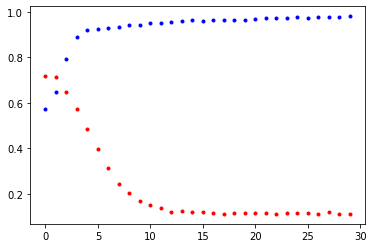

In [17]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)
plt.show()

In [18]:
model_1 = tf.keras.models.load_model('/Users/jjink/Desktop/python/model/30-0.1111.hdf5')
pred = model_1.predict(x_1)

print(pred[5])
print('\n')
print(model.evaluate(x_1, y_1))

[1.]


31/31 [==============================] - 0s 299us/step - loss: 0.0625 - accuracy: 0.9807
[0.06252910196781158, 0.9806910753250122]


## credit card - normal_amount, normal_time, split (X), sampling(n / 3:1)

In [72]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['normal_Amount'] = scale(df['Amount'])
df['normal_Time'] = scale(df['Time'])
df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=1476, random_state = 10)
data = pd.concat([a, c])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount,normal_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229,-1.988034
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758,-1.986644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031,-1.902623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342,-1.849472
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231,-1.838248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247493,-0.466202,1.224586,-0.055462,-0.398158,0.732600,-0.816955,1.536624,-0.540742,0.227722,-0.884476,...,0.510940,-0.331931,-0.153457,-0.180279,0.532849,-0.019341,0.027073,0,-0.113384,1.237788
2842,-0.366162,0.658492,0.867226,-2.202041,0.611087,-0.746637,1.092693,-0.278648,0.847974,-1.196239,...,0.585969,-0.329431,-0.417532,0.070478,-0.779169,0.255392,-0.021923,0,-0.349231,-1.945623
96883,1.147861,1.261737,-1.492747,1.522315,1.047910,-1.135590,0.650327,-0.156269,-0.836451,-1.447603,...,-0.180123,-0.175064,-0.080476,0.752524,-0.297092,0.057743,0.087034,0,-0.349231,-0.607139
82348,1.192189,-0.063020,0.130224,0.048602,-0.576313,-1.146488,0.121625,-0.078745,-0.049724,0.077990,...,-1.355440,0.222594,0.504134,-0.032130,0.595740,-0.122185,-0.004030,0,-0.221333,-0.746437


In [73]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)

In [74]:
model = Sequential()
model.add(Dense(30, input_dim = 30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [75]:
MODEL_DIR = '/Users/jjink/Desktop/python/model/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)
    
modelpath = '/Users/jjink/Desktop/python/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True) # verbose = 1 진행과정 막대기 출력
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

In [76]:
history = model.fit(x_1,y_1, validation_split = 0.1, epochs = 30, batch_size = 100, callbacks = [checkpointer,early_stopping_callback])

Epoch 1/30
18/18 [==============================] - 0s 5ms/step - loss: 0.7133 - accuracy: 0.3506 - val_loss: 0.7516 - val_accuracy: 0.3503

Epoch 00001: val_loss improved from inf to 0.75160, saving model to /Users/jjink/Desktop/python/model/01-0.7516.hdf5
Epoch 2/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.6124 - val_loss: 0.5999 - val_accuracy: 0.7766

Epoch 00002: val_loss improved from 0.75160 to 0.59993, saving model to /Users/jjink/Desktop/python/model/02-0.5999.hdf5
Epoch 3/30
18/18 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.8503 - val_loss: 0.4781 - val_accuracy: 0.9594

Epoch 00003: val_loss improved from 0.59993 to 0.47812, saving model to /Users/jjink/Desktop/python/model/03-0.4781.hdf5
Epoch 4/30
18/18 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.9325 - val_loss: 0.3779 - val_accuracy: 0.9797

Epoch 00004: val_loss improved from 0.47812 to 0.37790, saving model to /User

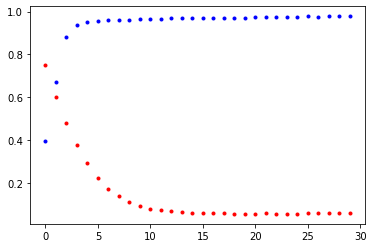

In [77]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)
plt.show()

In [78]:
model_1 = tf.keras.models.load_model('/Users/jjink/Desktop/python/model/24-0.0543.hdf5')
pred = model_1.predict(x_1)

print(pred[5])
print('\n')
print(model.evaluate(x_1, y_1))

[1.]


62/62 [==============================] - 0s 308us/step - loss: 0.0657 - accuracy: 0.9787
[0.06572145223617554, 0.9786585569381714]


## credit card - normal_amount, normal_time, split (O), sampling(n / 1:1)

In [86]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['normal_Amount'] = scale(df['Amount'])
df['normal_Time'] = scale(df['Time'])
df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=492, random_state = 10)
data = pd.concat([a, c])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount,normal_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229,-1.988034
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758,-1.986644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031,-1.902623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342,-1.849472
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231,-1.838248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142905,-0.341475,0.900211,0.331773,0.813116,3.184109,3.824945,0.221303,0.577237,-0.819912,0.411051,...,0.229812,-0.281175,0.901199,-0.396459,-0.097724,-0.266486,-0.266440,0,-0.350191,-0.206491
266742,0.051338,0.250632,-0.146602,-0.603377,-0.289108,0.867031,-0.716845,0.916121,0.761860,-1.107982,...,0.682096,0.262251,-0.396272,-1.105012,0.357460,-0.058522,-0.011369,0,-0.065367,1.424719
135785,-0.510727,0.784119,1.619260,-0.063728,-0.287118,-0.758775,0.451503,0.193062,-0.337795,-0.081085,...,-0.626206,0.039477,0.455717,-0.320913,0.048237,0.243857,0.109477,0,-0.317287,-0.282510
284703,1.019594,-1.956473,-1.431268,0.539727,-0.499995,0.301251,0.326079,-0.062475,1.121288,-0.403165,...,-1.202749,-0.182683,-1.075679,-0.417648,-1.080842,-0.049144,0.039078,0,1.733372,1.640099


In [87]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.15, random_state = 5)

In [91]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 30)

Epoch 1/10
2/2 [==============================] - 0s 82ms/step - loss: 0.4803 - accuracy: 0.6956 - val_loss: 0.4296 - val_accuracy: 0.7440
Epoch 2/10
2/2 [==============================] - 0s 14ms/step - loss: 0.4633 - accuracy: 0.7160 - val_loss: 0.4061 - val_accuracy: 0.7679
Epoch 3/10
2/2 [==============================] - 0s 17ms/step - loss: 0.4311 - accuracy: 0.7448 - val_loss: 0.3859 - val_accuracy: 0.7857
Epoch 4/10
2/2 [==============================] - 0s 17ms/step - loss: 0.4022 - accuracy: 0.7830 - val_loss: 0.3678 - val_accuracy: 0.8155
Epoch 5/10
2/2 [==============================] - 0s 17ms/step - loss: 0.3866 - accuracy: 0.8108 - val_loss: 0.3516 - val_accuracy: 0.8571
Epoch 6/10
2/2 [==============================] - 0s 18ms/step - loss: 0.3594 - accuracy: 0.8419 - val_loss: 0.3371 - val_accuracy: 0.8810
Epoch 7/10
2/2 [==============================] - 0s 17ms/step - loss: 0.3485 - accuracy: 0.8595 - val_loss: 0.3241 - val_accuracy: 0.8988
Epoch 8/10
2/2 [===========

In [92]:
print(model.evaluate(x_test, y_test))

5/5 [==============================] - 0s 754us/step - loss: 0.2750 - accuracy: 0.9324
[0.274978369474411, 0.9324324131011963]


## credit card - normal_amount, normal_time, split (O), sampling(n / 3:1)

In [94]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['normal_Amount'] = scale(df['Amount'])
df['normal_Time'] = scale(df['Time'])
df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=1479, random_state = 10)
data = pd.concat([a, c])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount,normal_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229,-1.988034
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758,-1.986644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031,-1.902623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342,-1.849472
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231,-1.838248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82348,1.192189,-0.063020,0.130224,0.048602,-0.576313,-1.146488,0.121625,-0.078745,-0.049724,0.077990,...,-1.355440,0.222594,0.504134,-0.032130,0.595740,-0.122185,-0.004030,0,-0.221333,-0.746437
168613,-1.197471,1.388525,0.215220,-0.922353,-0.130133,-0.381091,-0.076796,0.482383,0.892307,-0.981222,...,-0.779128,0.090628,0.495131,-0.231955,-0.340336,-0.544392,0.054976,0,-0.344314,0.515796
7001,1.266916,-0.227154,-0.283104,-0.396024,1.536413,3.735560,-1.267179,0.924951,1.751111,-0.424252,...,-0.252073,0.004096,0.978280,0.303960,0.432750,-0.023538,0.015141,0,-0.320685,-1.803608
67891,-1.792495,1.881797,0.580080,1.070823,-0.852380,-0.013791,-0.523862,1.327319,-0.602669,-0.772385,...,-0.123419,0.056480,0.094167,-0.126013,-0.466111,-0.208815,-0.003144,0,-0.304493,-0.885988


In [95]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.15, random_state = 5)

In [96]:
model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 30)

Epoch 1/10
4/4 [==============================] - 0s 28ms/step - loss: 0.9662 - accuracy: 0.6500 - val_loss: 0.7405 - val_accuracy: 0.6776
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7361 - accuracy: 0.6864 - val_loss: 0.6134 - val_accuracy: 0.7582
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5867 - accuracy: 0.7727 - val_loss: 0.5583 - val_accuracy: 0.8448
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 0.8855 - val_loss: 0.5316 - val_accuracy: 0.8866
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5076 - accuracy: 0.8950 - val_loss: 0.5089 - val_accuracy: 0.8925
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.9076 - val_loss: 0.4868 - val_accuracy: 0.8985
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4615 - accuracy: 0.9169 - val_loss: 0.4650 - val_accuracy: 0.9015
Epoch 8/10
4/4 [=================

In [97]:
print(model.evaluate(x_test, y_test))

10/10 [==============================] - 0s 615us/step - loss: 0.3783 - accuracy: 0.9392
[0.37833890318870544, 0.9391891956329346]


## credit card - minmax_amount, minmax_time, split (O), sampling(n / 1:1)

In [145]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['minmax_Amount'] = minmax_scale(df['Amount'])
df['minmax_Time'] = minmax_scale(df['Time'])
df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=492, random_state = 10)
data = pd.concat([a, c])
data

df.head()

y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.15, random_state = 5)

model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 10)

Epoch 1/10
67/67 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.6570 - val_loss: 0.2904 - val_accuracy: 0.9048
Epoch 2/10
67/67 [==============================] - 0s 663us/step - loss: 0.2543 - accuracy: 0.9345 - val_loss: 0.2057 - val_accuracy: 0.9464
Epoch 3/10
67/67 [==============================] - 0s 647us/step - loss: 0.1693 - accuracy: 0.9600 - val_loss: 0.1755 - val_accuracy: 0.9464
Epoch 4/10
67/67 [==============================] - 0s 648us/step - loss: 0.1269 - accuracy: 0.9691 - val_loss: 0.1623 - val_accuracy: 0.9464
Epoch 5/10
67/67 [==============================] - 0s 662us/step - loss: 0.1246 - accuracy: 0.9583 - val_loss: 0.1547 - val_accuracy: 0.9405
Epoch 6/10
67/67 [==============================] - 0s 659us/step - loss: 0.1302 - accuracy: 0.9566 - val_loss: 0.1514 - val_accuracy: 0.9405
Epoch 7/10
67/67 [==============================] - 0s 637us/step - loss: 0.0967 - accuracy: 0.9635 - val_loss: 0.1519 - val_accuracy: 0.9405
Epoch 8/

## credit card - robust_amount, robust_time, split (O), sampling(n / 1:1)

In [147]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['robust_Amount'] = robust_scale(df['Amount'])
df['robust_Time'] = robust_scale(df['Time'])

df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=492, random_state = 10)
data = pd.concat([a, c])
data

df.head()

y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.15, random_state = 5)

model = Sequential()
model.add(Dense(40, input_dim = 30, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 10)

Epoch 1/10
67/67 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.8274 - val_loss: 0.3199 - val_accuracy: 0.8869
Epoch 2/10
67/67 [==============================] - 0s 671us/step - loss: 0.2475 - accuracy: 0.9182 - val_loss: 0.2455 - val_accuracy: 0.9167
Epoch 3/10
67/67 [==============================] - 0s 639us/step - loss: 0.1813 - accuracy: 0.9334 - val_loss: 0.2056 - val_accuracy: 0.9345
Epoch 4/10
67/67 [==============================] - 0s 668us/step - loss: 0.1193 - accuracy: 0.9606 - val_loss: 0.1851 - val_accuracy: 0.9226
Epoch 5/10
67/67 [==============================] - 0s 632us/step - loss: 0.1273 - accuracy: 0.9581 - val_loss: 0.1827 - val_accuracy: 0.9226
Epoch 6/10
67/67 [==============================] - 0s 649us/step - loss: 0.0941 - accuracy: 0.9627 - val_loss: 0.1761 - val_accuracy: 0.9286
Epoch 7/10
67/67 [==============================] - 0s 636us/step - loss: 0.1335 - accuracy: 0.9450 - val_loss: 0.1763 - val_accuracy: 0.9286
Epoch 8/

## Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [118]:
df = pd.read_csv('/Users/jjink/Desktop/python/data/creditcard.csv')

df['normal_Amount'] = scale(df['Amount'])
df['normal_Time'] = scale(df['Time'])
df = df.drop(['Amount', 'Time'], axis = 1, inplace = False)

a =  df[df['Class'] == 1]
b = df[df['Class'] == 0]
c = b.sample(n=492, random_state = 10)
data = pd.concat([a, c])
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normal_Amount,normal_Time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229,-1.988034
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758,-1.986644
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031,-1.902623
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342,-1.849472
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231,-1.838248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142905,-0.341475,0.900211,0.331773,0.813116,3.184109,3.824945,0.221303,0.577237,-0.819912,0.411051,...,0.229812,-0.281175,0.901199,-0.396459,-0.097724,-0.266486,-0.266440,0,-0.350191,-0.206491
266742,0.051338,0.250632,-0.146602,-0.603377,-0.289108,0.867031,-0.716845,0.916121,0.761860,-1.107982,...,0.682096,0.262251,-0.396272,-1.105012,0.357460,-0.058522,-0.011369,0,-0.065367,1.424719
135785,-0.510727,0.784119,1.619260,-0.063728,-0.287118,-0.758775,0.451503,0.193062,-0.337795,-0.081085,...,-0.626206,0.039477,0.455717,-0.320913,0.048237,0.243857,0.109477,0,-0.317287,-0.282510
284703,1.019594,-1.956473,-1.431268,0.539727,-0.499995,0.301251,0.326079,-0.062475,1.121288,-0.403165,...,-1.202749,-0.182683,-1.075679,-0.417648,-1.080842,-0.049144,0.039078,0,1.733372,1.640099


In [119]:
y_1 = data['Class']
x_1 = data.drop(['Class'], axis = 1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.2, random_state = 5)

In [120]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [122]:
lr_pred_test = lr_model.predict(x_test)

In [123]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_test).ravel()
conf_matrix = pd.DataFrame({'Predicted Fraud': [tp, fp],'Predicted Not Fraud': [fn, tn]}, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,84,8
Not Fraud,3,102


<AxesSubplot:>

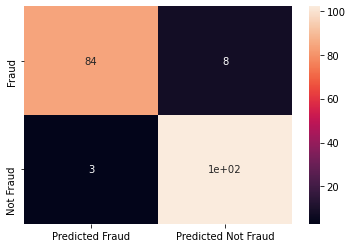

In [124]:
sns.heatmap(conf_matrix, annot=True)

In [126]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_precision = precision_score(y_test, lr_pred_test)
lr_recall = recall_score(y_test, lr_pred_test)
lr_f1 = f1_score(y_test, lr_pred_test)
print(lr_accuracy, lr_precision, lr_recall, lr_f1)

0.9441624365482234 0.9655172413793104 0.9130434782608695 0.9385474860335196


In [140]:
lr_pred_test_prob = lr_model.predict_proba(x_test)[:, 1]

In [133]:
fpr, tpr, threshold = roc_curve(y_test, lr_pred_test_prob)

In [135]:
lr_auc = roc_auc_score(y_test, lr_pred_test_prob)
lr_auc

0.9583850931677019

In [136]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

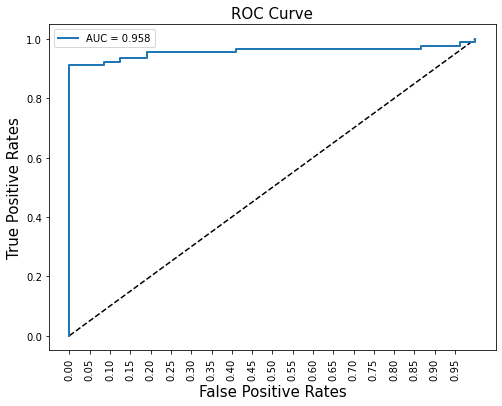

In [137]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)